In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc as pm
import arviz as az  # if you're using it later for summaries/plots

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [2]:
# !pip install seaborn

In [3]:
input_df = pd.read_excel("input_data1.xlsx")

In [4]:
input_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'YearMonth', 'value', 'weeks_in_month', 'weekly_revenue', 'extravol',
       'wd', 'bigpack', 'tourist_arrivals_in_million', 'free_with_others',
       'week5_si', 'top_of_mind_brand_awareness', 'welfare_additional_boost',
       'buyget', 'pmd', 'free_with_others_darlie', 'loyalty', 'welfare',
       'panic_pantry_loading', 'closeness_top_3_box', 'near_pack', 'rl',
       'target_discount', 'darlie_discount', 'total_unaided_brand_awareness',
       'theme', 'freepremium', 'trendline', 'week13_si', 'target_price', 'tpr',
       'darlie_cdc_basepri

In [5]:
# media variables
media_vars = ['CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV']

In [6]:
# sorted(list(set(input_df.columns)-set(media_variables)))

In [7]:
#data_cols = ['week_date','YearMonth', 'weeks_in_month']
# store week_date in data_cols
data_cols = ['week_date']

In [8]:
# control variables
control_vars = ['aided_awareness',
 'bigpack',
 'buyget',
 'chim_shop_chai',
 'closeness_top_3_box',
 'consumer_confidence_index',
 'darlie_cdc_basepriceratio',
 'darlie_discount',
 'extravol',
 'extravol_darlie',
 'free_promo',
 'free_promo_darlie',
 'free_with_others',
 'free_with_others_darlie',
 'freepremium',
 'loyalty',
 'nd',
 'near_pack',
 'panic_pantry_loading',
 'pmd',
 'rl',
 'target_baseprice',
 'target_discount',
 'target_price',
 'theme',
 'top_of_mind_brand_awareness',
 'total_unaided_brand_awareness',
 'tourist_arrivals_in_million',
 'tpr',
 'tpr_darlie',
 'trendline',
 'wd',
 'week13_si',
 'week5_si',
 'welfare',
 'welfare_additional_boost']

In [9]:
#rev_cols = ['value','weekly_revenue']
# store weekly_revenue in rev_cols
rev_cols = ['weekly_revenue']

In [10]:
# add all columns
req_cols = data_cols + media_vars + control_vars + rev_cols

In [11]:
print(req_cols)

['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL', 'EQUITY+IN STORE', 'EQUITY+OOH', 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV', 'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV', 'SALT+DIGITAL', 'SALT+IN STORE', 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL', 'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV', 'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai', 'closeness_top_3_box', 'consumer_confidence_index', 'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol', 'extravol_darlie', 'free_promo', 'free_promo_darlie', 'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty', 'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl', 'target_baseprice', 'target_discount', 'target_price', 'theme', 'top_of_mind_brand_awareness', 'total_unaided_brand_awareness', 'tourist_arrivals_in_million', 'tpr', 'tpr_darlie', 'trendline', 'wd', 'week13_si', 'week5_si', 'welfare', 'welfare_additional_

In [12]:
# keep only req_cols in input_df
input_df = input_df[req_cols]

In [13]:
input_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,0.0,1066450.0,2.815029e+05,0,0.0,0,266200.0,0.000000,0.0,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,0.0,0.0,1.106151e+06,0,0.0,422400,2437000.0,625098.632734,0.0,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [14]:
input_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

# Adstocking

In [15]:
def apply_geometric_adstock(input_df, media_columns, decay_rate):    
    # Create a copy to avoid modifying original dataframe
    df_adstocked = input_df.copy()
    
    # Validate decay rate
    if not 0 <= decay_rate <= 1:
        raise ValueError("Decay rate must be between 0 and 1")
    
    # Validate media columns exist in dataframe
    missing_cols = [col for col in media_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
    # Apply geometric adstocking only to media columns
    for media_col in media_columns:
        adstocked_values = []
        adstock = 0
        
        for value in input_df[media_col]:
            adstock = value + decay_rate * adstock
            adstocked_values.append(adstock)
        
        # Replace the original column with adstocked values
        df_adstocked[media_col] = adstocked_values
    
    return df_adstocked

In [16]:
decay_rate = 0.5
adstocked_df = apply_geometric_adstock(input_df, media_vars, decay_rate)

# # Or different decay rates per channel
# media_decay_dict = {
#     'TV': 0.7,
#     'Digital': 0.3, 
#     'Radio': 0.5,
#     'Print': 0.4
# }
# adstocked_df = apply_geometric_adstock_multi_decay(input_df, media_decay_dict)

In [17]:
adstocked_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,0.000000e+00,1.318312e+06,1.023217e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,0.000000e+00,1.977469e+06,1.534825e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,0.000000e+00,2.307047e+06,1.790629e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,0.000000e+00,2.471836e+06,1.918531e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,0.000000e+00,2.302368e+06,3.774295e+05,0.000000e+00,0.000000,0.0,2.662000e+05,0.000000e+00,0.000000,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.133959e-10,2.676570e-01,2.544828e+06,9.464217e-18,94297.010938,792000.0,4.816163e+06,1.225663e+06,1834.556580,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,5.669797e-11,1.338285e-01,1.672551e+06,4.732108e-18,47148.505469,396000.0,4.028644e+06,1.337330e+06,917.278290,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,2.834899e-11,6.691424e-02,1.236412e+06,2.366054e-18,23574.252734,198000.0,3.634885e+06,1.393163e+06,458.639145,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.417449e-11,3.345712e-02,1.018343e+06,1.183027e-18,11787.126367,99000.0,3.438005e+06,1.421080e+06,229.319572,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [18]:
adstocked_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

In [19]:
def apply_hill_saturation(input_df, media_columns, alpha, gamma):
    # Create a copy to avoid modifying original dataframe
    df_transformed = input_df.copy()
    
    # Validate parameters
    if alpha <= 0:
        raise ValueError("Alpha (half-saturation point) must be positive")
    if gamma <= 0:
        raise ValueError("Gamma (shape parameter) must be positive")
    
    # Validate media columns exist in dataframe
    missing_cols = [col for col in media_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
    # Apply Hill transformation only to media columns
    for media_col in media_columns:
        x = input_df[media_col].values
        
        # Handle zero values to avoid division by zero
        x = np.maximum(x, 1e-10)
        
        # Apply Hill transformation
        numerator = alpha * (x ** gamma)
        denominator = (alpha ** gamma) + (x ** gamma)
        hill_transformed = numerator / denominator
        
        # Replace the original column with transformed values
        df_transformed[media_col] = hill_transformed
    
    return df_transformed

In [20]:

def apply_hill_saturation_multi_params(input_df, media_params_dict):
    
    # Create a copy to avoid modifying original dataframe
    df_transformed = input_df.copy()
    
    # Validate parameters and columns
    for media_col, (alpha, gamma) in media_params_dict.items():
        if media_col not in input_df.columns:
            raise ValueError(f"Media column '{media_col}' not found in dataframe")
        if alpha <= 0:
            raise ValueError(f"Alpha for {media_col} must be positive")
        if gamma <= 0:
            raise ValueError(f"Gamma for {media_col} must be positive")
    
    # Apply Hill transformation to each media column with its specific parameters
    for media_col, (alpha, gamma) in media_params_dict.items():
        x = input_df[media_col].values
        
        # Handle zero values to avoid division by zero
        x = np.maximum(x, 1e-10)
        
        # Apply Hill transformation
        numerator = alpha * (x ** gamma)
        denominator = (alpha ** gamma) + (x ** gamma)
        hill_transformed = numerator / denominator
        
        # Replace the original column with transformed values
        df_transformed[media_col] = hill_transformed
    
    return df_transformed

In [21]:
alpha = 100
gamma = 2
hill_df  = apply_hill_saturation(input_df, media_vars, alpha, gamma)

In [22]:


def plot_saturation_curves(input_df, media_vars, alpha, gamma, figsize=(15, 10)):
    """
    Plot Hill saturation curves for each media variable.
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Original dataframe with media variables
    media_vars : list
        List of media variable column names
    alpha : float
        Half-saturation point used in Hill transformation
    gamma : float
        Shape parameter used in Hill transformation
    figsize : tuple
        Figure size for the plots
    """
    
    # Calculate number of subplots needed
    n_media = len(media_vars)
    n_cols = min(3, n_media)  # Max 3 columns
    n_rows = (n_media + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where there's only one subplot
    if n_media == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes array for easier indexing
    axes_flat = axes.flatten() if n_media > 1 else axes
    
    for i, media_var in enumerate(media_vars):
        # Get the spend range for this media variable
        min_spend = input_df[media_var].min()
        max_spend = input_df[media_var].max()
        
        # Create a range from 0 to max spend for smooth curve
        spend_range = np.linspace(0, max_spend * 1.2, 1000)  # Extend 20% beyond max
        
        # Apply Hill transformation to the range
        spend_range_safe = np.maximum(spend_range, 1e-10)  # Avoid division by zero
        numerator = alpha * (spend_range_safe ** gamma)
        denominator = (alpha ** gamma) + (spend_range_safe ** gamma)
        saturation_response = numerator / denominator
        
        # Plot the saturation curve
        ax = axes_flat[i]
        ax.plot(spend_range, saturation_response, 'b-', linewidth=2, label='Saturation Curve')
        
        # Add scatter plot of actual data points
        actual_spend = input_df[media_var].values
        actual_spend_safe = np.maximum(actual_spend, 1e-10)
        actual_numerator = alpha * (actual_spend_safe ** gamma)
        actual_denominator = (alpha ** gamma) + (actual_spend_safe ** gamma)
        actual_response = actual_numerator / actual_denominator
        
        ax.scatter(actual_spend, actual_response, alpha=0.6, color='red', s=30, label='Actual Data Points')
        
        # Add half-saturation point
        half_sat_response = alpha * (alpha ** gamma) / ((alpha ** gamma) + (alpha ** gamma))
        ax.axvline(x=alpha, color='orange', linestyle='--', alpha=0.7, label=f'Half-saturation (α={alpha})')
        ax.axhline(y=half_sat_response, color='orange', linestyle='--', alpha=0.7)
        
        # Formatting
        ax.set_xlabel('Media Spend')
        ax.set_ylabel('Saturation Response')
        ax.set_title(f'{media_var} - Hill Saturation Curve\n(α={alpha}, γ={gamma})')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add text annotation for key metrics
        ax.text(0.05, 0.95, f'Max Response: {saturation_response.max():.3f}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide unused subplots
    for j in range(n_media, len(axes_flat)):
        axes_flat[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations, figsize=(15, 8)):
    """
    Compare different alpha/gamma combinations for a single media variable.
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Original dataframe
    media_vars : list
        List of media variables (will use first one for comparison)
    alpha_gamma_combinations : list of tuples
        List of (alpha, gamma) combinations to compare
        Example: [(50, 1.5), (100, 2.0), (150, 2.5)]
    """
    
    # Use first media variable for comparison
    media_var = media_vars[0]
    max_spend = input_df[media_var].max()
    spend_range = np.linspace(0, max_spend * 1.2, 1000)
    
    plt.figure(figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(alpha_gamma_combinations)))
    
    for i, (alpha, gamma) in enumerate(alpha_gamma_combinations):
        # Apply Hill transformation
        spend_range_safe = np.maximum(spend_range, 1e-10)
        numerator = alpha * (spend_range_safe ** gamma)
        denominator = (alpha ** gamma) + (spend_range_safe ** gamma)
        saturation_response = numerator / denominator
        
        plt.plot(spend_range, saturation_response, 
                linewidth=2, color=colors[i], 
                label=f'α={alpha}, γ={gamma}')
        
        # Add half-saturation point
        half_sat_response = alpha * (alpha ** gamma) / ((alpha ** gamma) + (alpha ** gamma))
        plt.axvline(x=alpha, color=colors[i], linestyle='--', alpha=0.5)
    
    plt.xlabel('Media Spend')
    plt.ylabel('Saturation Response')
    plt.title(f'{media_var} - Saturation Curve Comparison')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_saturation_summary_stats(hill_df, input_df, media_vars):
    """
    Plot summary statistics comparing original vs transformed values.
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Prepare data for comparison
    original_data = []
    transformed_data = []
    media_names = []
    
    for media_var in media_vars:
        original_data.extend(input_df[media_var].values)
        transformed_data.extend(hill_df[media_var].values)
        media_names.extend([media_var] * len(input_df))
    
    comparison_df = pd.DataFrame({
        'Media': media_names,
        'Original': original_data,
        'Transformed': transformed_data
    })
    
    # Plot 1: Original distribution
    sns.boxplot(data=comparison_df, x='Media', y='Original', ax=axes[0,0])
    axes[0,0].set_title('Original Media Spend Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Transformed distribution
    sns.boxplot(data=comparison_df, x='Media', y='Transformed', ax=axes[0,1])
    axes[0,1].set_title('Hill Transformed Distribution')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Scatter plot - Original vs Transformed
    colors = plt.cm.Set1(np.linspace(0, 1, len(media_vars)))
    for i, media_var in enumerate(media_vars):
        axes[1,0].scatter(input_df[media_var], hill_df[media_var], 
                         alpha=0.6, label=media_var, color=colors[i])
    axes[1,0].set_xlabel('Original Spend')
    axes[1,0].set_ylabel('Transformed Response')
    axes[1,0].set_title('Original vs Transformed Values')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Transformation ratio
    for i, media_var in enumerate(media_vars):
        ratio = hill_df[media_var] / (input_df[media_var] + 1e-10)  # Avoid division by zero
        axes[1,1].hist(ratio, alpha=0.7, label=media_var, bins=20, color=colors[i])
    axes[1,1].set_xlabel('Transformation Ratio (Transformed/Original)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Distribution of Transformation Ratios')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Usage examples:
"""
# Basic saturation curves for your data
plot_saturation_curves(input_df, media_vars, alpha=100, gamma=2)

# Compare different parameter combinations
alpha_gamma_combinations = [
    (50, 1.5),   # Lower saturation point, gentler curve
    (100, 2.0),  # Your current parameters
    (150, 2.5),  # Higher saturation point, steeper curve
]
plot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations)

# Summary statistics comparison
plot_saturation_summary_stats(hill_df, input_df, media_vars)
"""

'\n# Basic saturation curves for your data\nplot_saturation_curves(input_df, media_vars, alpha=100, gamma=2)\n\n# Compare different parameter combinations\nalpha_gamma_combinations = [\n    (50, 1.5),   # Lower saturation point, gentler curve\n    (100, 2.0),  # Your current parameters\n    (150, 2.5),  # Higher saturation point, steeper curve\n]\nplot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations)\n\n# Summary statistics comparison\nplot_saturation_summary_stats(hill_df, input_df, media_vars)\n'

In [23]:
hill_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,1.000000e-22,1.000000e+02,99.999987,1.000000e-22,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e-22,1.000000e-22,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.000000e-22,1.000000e-22,99.999999,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


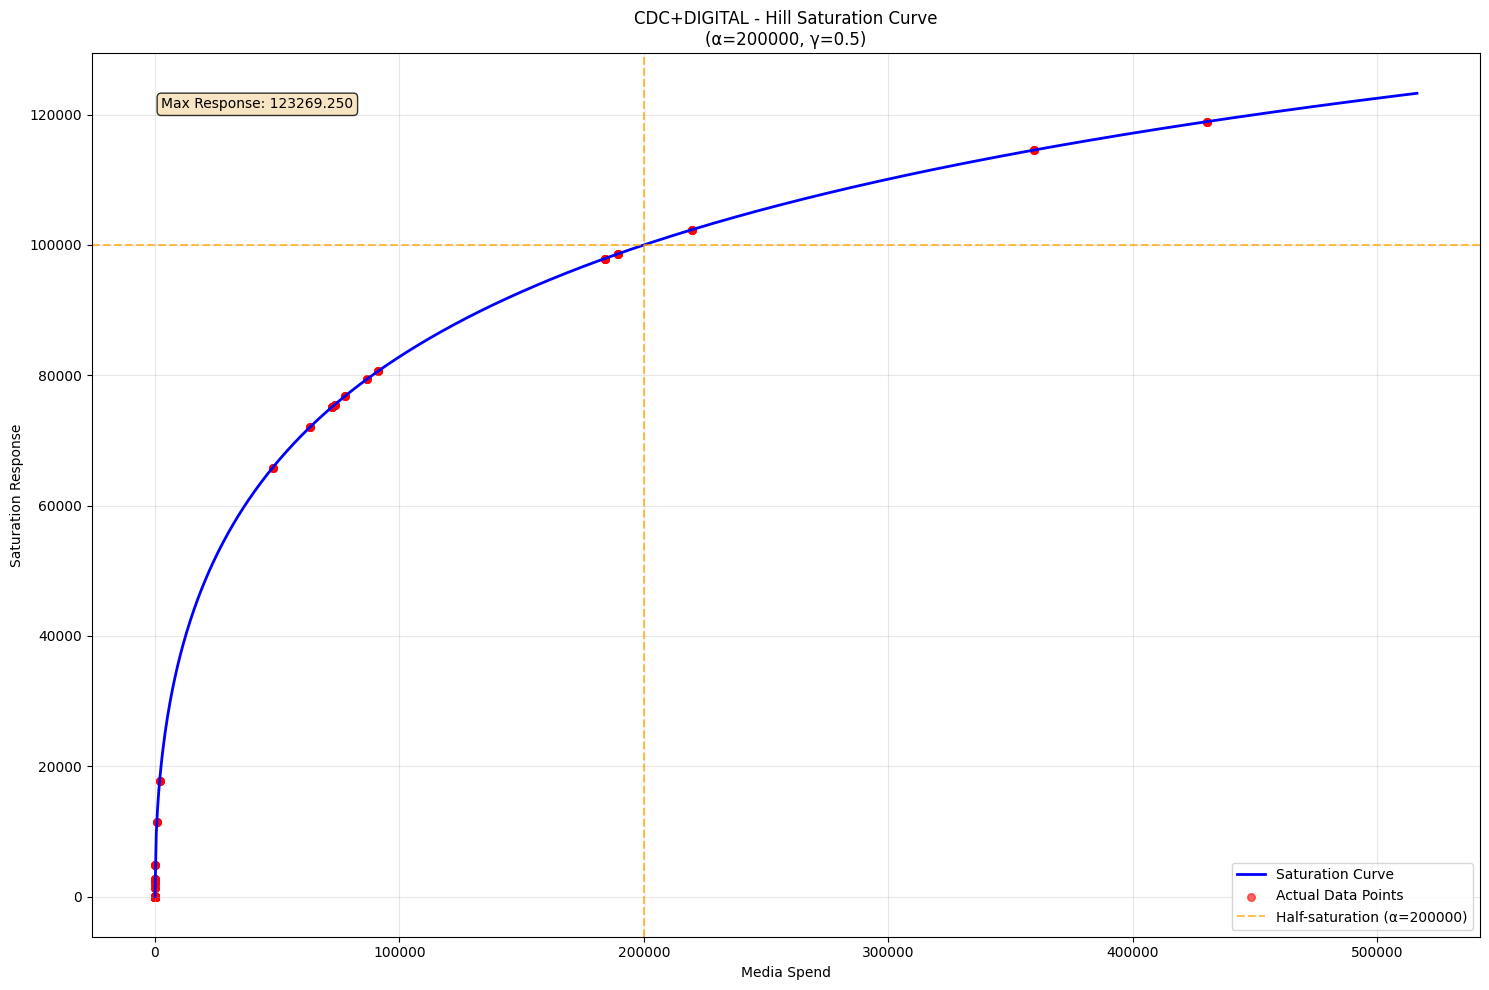

In [24]:
# 1. Basic saturation curves for all your media variables
plot_saturation_curves(input_df, media_vars[:1], alpha=200000, gamma=0.5)

In [25]:
def apply_z_scaling(input_df, feature_columns, target_column=None, 
                   scale_target=False, save_scaler=True, scaler_path=None):
    """
    Apply z-scaling (standardization) to features and optionally target variable.
    
    Z-scaling formula: z = (x - mean) / std
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Input dataframe with transformed media variables and controls
    feature_columns : list
        List of column names to be scaled (media + control variables)
    target_column : str, optional
        Target variable column name
    scale_target : bool, default=False
        Whether to scale the target variable (usually not recommended for MMM)
    save_scaler : bool, default=True
        Whether to save scaler objects for later inverse transformation
    scaler_path : str, optional
        Path to save scaler objects
    
    Returns:
    --------
    dict containing:
        - 'scaled_df': DataFrame with scaled features
        - 'feature_scaler': Fitted StandardScaler for features
        - 'target_scaler': Fitted StandardScaler for target (if scale_target=True)
        - 'scaling_summary': Summary statistics of scaling
    """
    
    # Create copy to avoid modifying original
    df_scaled = input_df.copy()
    
    # Validate columns exist
    missing_cols = [col for col in feature_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Feature columns not found: {missing_cols}")
    
    if target_column and target_column not in input_df.columns:
        raise ValueError(f"Target column '{target_column}' not found")
    
    # Initialize scalers
    feature_scaler = StandardScaler()
    target_scaler = None
    
    # Scale features
    print(f"Scaling {len(feature_columns)} feature columns...")
    original_features = df_scaled[feature_columns].copy()
    scaled_features = feature_scaler.fit_transform(df_scaled[feature_columns])
    df_scaled[feature_columns] = scaled_features
    
    # Scale target if requested
    if scale_target and target_column:
        print(f"Scaling target column: {target_column}")
        target_scaler = StandardScaler()
        original_target = df_scaled[[target_column]].copy()
        scaled_target = target_scaler.fit_transform(df_scaled[[target_column]])
        df_scaled[target_column] = scaled_target.flatten()
    
    # Create scaling summary
    scaling_summary = create_scaling_summary(original_features, df_scaled[feature_columns], feature_columns)
    
    # Save scalers if requested
    if save_scaler:
        if scaler_path:
            save_scalers(feature_scaler, target_scaler, scaler_path)
        else:
            print("Scalers created but not saved. Use 'save_scalers()' function if needed.")
    
    return {
        'scaled_df': df_scaled,
        'feature_scaler': feature_scaler,
        'target_scaler': target_scaler,
        'scaling_summary': scaling_summary
    }

def create_scaling_summary(original_df, scaled_df, column_names):
    """Create summary statistics comparing original vs scaled data."""
    
    summary_data = []
    
    for i, col in enumerate(column_names):
        original_col = original_df.iloc[:, i] if isinstance(original_df, np.ndarray) else original_df[col]
        scaled_col = scaled_df.iloc[:, i] if isinstance(scaled_df, np.ndarray) else scaled_df[col]
        
        summary_data.append({
            'Variable': col,
            'Original_Mean': original_col.mean(),
            'Original_Std': original_col.std(),
            'Original_Min': original_col.min(),
            'Original_Max': original_col.max(),
            'Scaled_Mean': scaled_col.mean(),
            'Scaled_Std': scaled_col.std(),
            'Scaled_Min': scaled_col.min(),
            'Scaled_Max': scaled_col.max()
        })
    
    return pd.DataFrame(summary_data)

def inverse_transform_features(scaled_df, feature_scaler, feature_columns):
    """
    Convert scaled features back to original scale.
    Useful for interpreting model results.
    """
    
    df_inverse = scaled_df.copy()
    
    # Inverse transform features
    original_features = feature_scaler.inverse_transform(scaled_df[feature_columns])
    df_inverse[feature_columns] = original_features
    
    return df_inverse

def inverse_transform_coefficients(coefficients, feature_scaler, feature_columns):
    """
    Convert model coefficients from scaled space back to original scale.
    Essential for business interpretation of MMM results.
    
    Parameters:
    -----------
    coefficients : dict or pd.Series
        Model coefficients for each feature
    feature_scaler : StandardScaler
        Fitted scaler used for features
    feature_columns : list
        List of feature column names
    
    Returns:
    --------
    dict : Coefficients in original scale
    """
    
    # Get scaling parameters
    feature_means = feature_scaler.mean_
    feature_stds = feature_scaler.scale_
    
    original_coefficients = {}
    
    for i, col in enumerate(feature_columns):
        if col in coefficients:
            # Convert coefficient: coef_original = coef_scaled / std_feature
            original_coefficients[col] = coefficients[col] / feature_stds[i]
    
    return original_coefficients

def save_scalers(feature_scaler, target_scaler, file_path):
    """Save scaler objects for later use."""
    
    scaler_dict = {
        'feature_scaler': feature_scaler,
        'target_scaler': target_scaler
    }
    
    with open(file_path, 'wb') as f:
        pickle.dump(scaler_dict, f)
    
    print(f"Scalers saved to: {file_path}")

def load_scalers(file_path):
    """Load previously saved scaler objects."""
    
    with open(file_path, 'rb') as f:
        scaler_dict = pickle.load(f)
    
    return scaler_dict['feature_scaler'], scaler_dict['target_scaler']

def validate_scaling(scaled_df, feature_columns):
    """
    Validate that scaling was applied correctly.
    Scaled features should have mean≈0 and std≈1.
    """
    
    validation_results = []
    
    for col in feature_columns:
        mean_val = scaled_df[col].mean()
        std_val = scaled_df[col].std()
        
        # Check if close to standard normal (allowing small numerical errors)
        mean_ok = abs(mean_val) < 1e-10
        std_ok = abs(std_val - 1.0) < 1e-10
        
        validation_results.append({
            'Variable': col,
            'Mean': mean_val,
            'Std': std_val,
            'Mean_OK': mean_ok,
            'Std_OK': std_ok,
            'Properly_Scaled': mean_ok and std_ok
        })
    
    validation_df = pd.DataFrame(validation_results)
    
    all_properly_scaled = validation_df['Properly_Scaled'].all()
    
    if all_properly_scaled:
        print("✅ All features properly scaled (mean≈0, std≈1)")
    else:
        print("⚠️  Some features may not be properly scaled:")
        problematic = validation_df[~validation_df['Properly_Scaled']]
        print(problematic[['Variable', 'Mean', 'Std']])
    
    return validation_df

In [26]:
hill_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,1.000000e-22,1.000000e+02,99.999987,1.000000e-22,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e-22,1.000000e-22,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.000000e-22,1.000000e-22,99.999999,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [27]:
all_features = media_vars + control_vars

# Apply z-scaling
scaling_result = apply_z_scaling(
    input_df=hill_df,  # Your Hill-transformed dataframe
    feature_columns=all_features,
    target_column='weekly_revenue',
    scale_target=False,  # Don't scale target for MMM
    save_scaler=True
)

Scaling 55 feature columns...
Scalers created but not saved. Use 'save_scalers()' function if needed.


In [28]:
final_df  = scaling_result['scaled_df']

In [29]:
final_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
1,2017-02-10,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
2,2017-02-17,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
3,2017-02-24,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
4,2017-03-03,-0.690798,0.415227,0.491242,-0.214834,-0.311086,-0.301511,1.040017,-1.187911,-0.25,...,0.455788,-0.387320,1.092901,-1.623926,0.350234,-0.186396,1.546158,-1.325427,-0.158511,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,-0.690798,-2.408319,0.497638,-0.214834,-0.311086,3.316627,1.040017,0.866770,-0.25,...,-1.988393,-1.894875,-3.303409,1.626823,-4.081229,-0.634275,-0.390239,-1.325427,-0.158511,22205975.0
200,2020-12-04,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0
201,2020-12-11,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0
202,2020-12-18,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0


In [87]:
final_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

In [30]:
# !pip install pymc

In [90]:

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [31]:

# Load your data
df = final_df.copy()


In [32]:

# ============================================================================
# 1. DEFINE VARIABLE GROUPS
# ============================================================================

# Media channels (already transformed with adstock)
media_channels = [
    'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL', 'EQUITY+IN STORE', 
    'EQUITY+OOH', 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
    'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
    'SALT+DIGITAL', 'SALT+IN STORE', 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 
    'SALT+TV', 'TOTAL+DIGITAL', 'TOTAL+IN STORE', 
    'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV'
]

# Control variables
control_vars = [
    'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
    'closeness_top_3_box', 'consumer_confidence_index',
    'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
    'extravol_darlie', 'free_promo', 'free_promo_darlie',
    'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
    'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
    'target_baseprice', 'target_discount', 'target_price', 'theme',
    'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
    'tourist_arrivals_in_million', 'tpr', 'tpr_darlie', 'trendline', 'wd',
    'week13_si', 'week5_si', 'welfare', 'welfare_additional_boost'
]

# Target variable
target = 'weekly_revenue'

# ============================================================================
# 2. PREPARE DATA FOR MODELING
# ============================================================================

# Extract arrays
y = df[target].values
X_media = df[media_channels].values
X_control = df[control_vars].values

n_obs = len(y)
n_media = len(media_channels)
n_control = len(control_vars)

print(f"Observations: {n_obs}")
print(f"Media channels: {n_media}")
print(f"Control variables: {n_control}")


Observations: 204
Media channels: 19
Control variables: 36


In [36]:

# ============================================================================
# 3. BUILD BAYESIAN MMM MODEL
# ============================================================================

with pm.Model() as mmm_model:
    
    # -----------------------------------
    # PRIORS
    # -----------------------------------
    
    # Intercept
    intercept = pm.Normal('intercept', mu=y.mean(), sigma=y.std())
    
    # Media coefficients - positive effect expected
    # Using HalfNormal to enforce positive contribution
    beta_media = pm.HalfNormal('beta_media', sigma=1, shape=n_media)
    
    # Control variable coefficients - can be positive or negative
    beta_control = pm.Normal('beta_control', mu=0, sigma=1, shape=n_control)
    
    # Noise/error term
    sigma = pm.HalfNormal('sigma', sigma=y.std())
    
    # -----------------------------------
    # LIKELIHOOD
    # -----------------------------------
    
    # Linear combination
    mu = (intercept + 
          pm.math.dot(X_media, beta_media) + 
          pm.math.dot(X_control, beta_control))
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    
    # -----------------------------------
    # SAMPLING
    # -----------------------------------
    
    # Sample from posterior
    trace = pm.sample(
        draws=50,           # Number of samples per chain 1000
        tune=50,            # Burn-in samples 1000
        chains=2,             # Number of chains
        target_accept=0.95,   # Higher for better convergence
        return_inferencedata=True,
        random_seed=42
    )
    
    # Prior predictive check
    prior_pred = pm.sample_prior_predictive(samples=500, random_seed=42)
    
    # Posterior predictive check
    post_pred = pm.sample_posterior_predictive(trace, random_seed=42)


Only 50 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, beta_media, beta_control, sigma]


Output()

Sampling 2 chains for 50 tune and 50 draw iterations (100 + 100 draws total) took 188 seconds.
The number of samples is too small to check convergence reliably.
Sampling: [beta_control, beta_media, intercept, sigma, y_obs]
Sampling: [y_obs]


Output()

In [38]:

# ============================================================================
# 4. MODEL DIAGNOSTICS
# ============================================================================

# Summary statistics
print("\n" + "="*80)
print("MODEL SUMMARY")
print("="*80)
summary = az.summary(trace, var_names=['intercept', 'beta_media', 'beta_control', 'sigma'])
print(summary)

# Convergence diagnostics
print("\n" + "="*80)
print("CONVERGENCE DIAGNOSTICS")
print("="*80)

# R-hat (should be < 1.01)
rhat = az.rhat(trace)
print(f"\nR-hat statistics:")
print(f"Max R-hat: {rhat.to_array().max().item():.4f}")
print(f"Variables with R-hat > 1.01: {(rhat.to_array() > 1.01).sum().item()}")

# Effective sample size
ess = az.ess(trace)
print(f"\nEffective Sample Size:")
print(f"Min ESS: {ess.to_array().min().item():.0f}")


MODEL SUMMARY
                          mean          sd        hdi_3%       hdi_97%  \
intercept         2.343312e+07      20.798  2.343310e+07  2.343315e+07   
beta_media[0]     7.210000e-01       0.599  9.000000e-03  1.997000e+00   
beta_media[1]     8.160000e-01       0.495  9.000000e-03  1.640000e+00   
beta_media[2]     8.040000e-01       0.656  1.300000e-02  1.911000e+00   
beta_media[3]     8.460000e-01       0.549  6.000000e-03  1.914000e+00   
beta_media[4]     6.720000e-01       0.621  2.000000e-03  1.849000e+00   
beta_media[5]     7.840000e-01       0.581  4.000000e-03  1.850000e+00   
beta_media[6]     7.880000e-01       0.510  1.800000e-02  1.719000e+00   
beta_media[7]     9.490000e-01       0.597  6.900000e-02  1.911000e+00   
beta_media[8]     7.310000e-01       0.664  0.000000e+00  1.911000e+00   
beta_media[9]     8.100000e-01       0.729  2.300000e-02  2.078000e+00   
beta_media[10]    8.390000e-01       0.696  1.500000e-02  2.079000e+00   
beta_media[11]    7.830

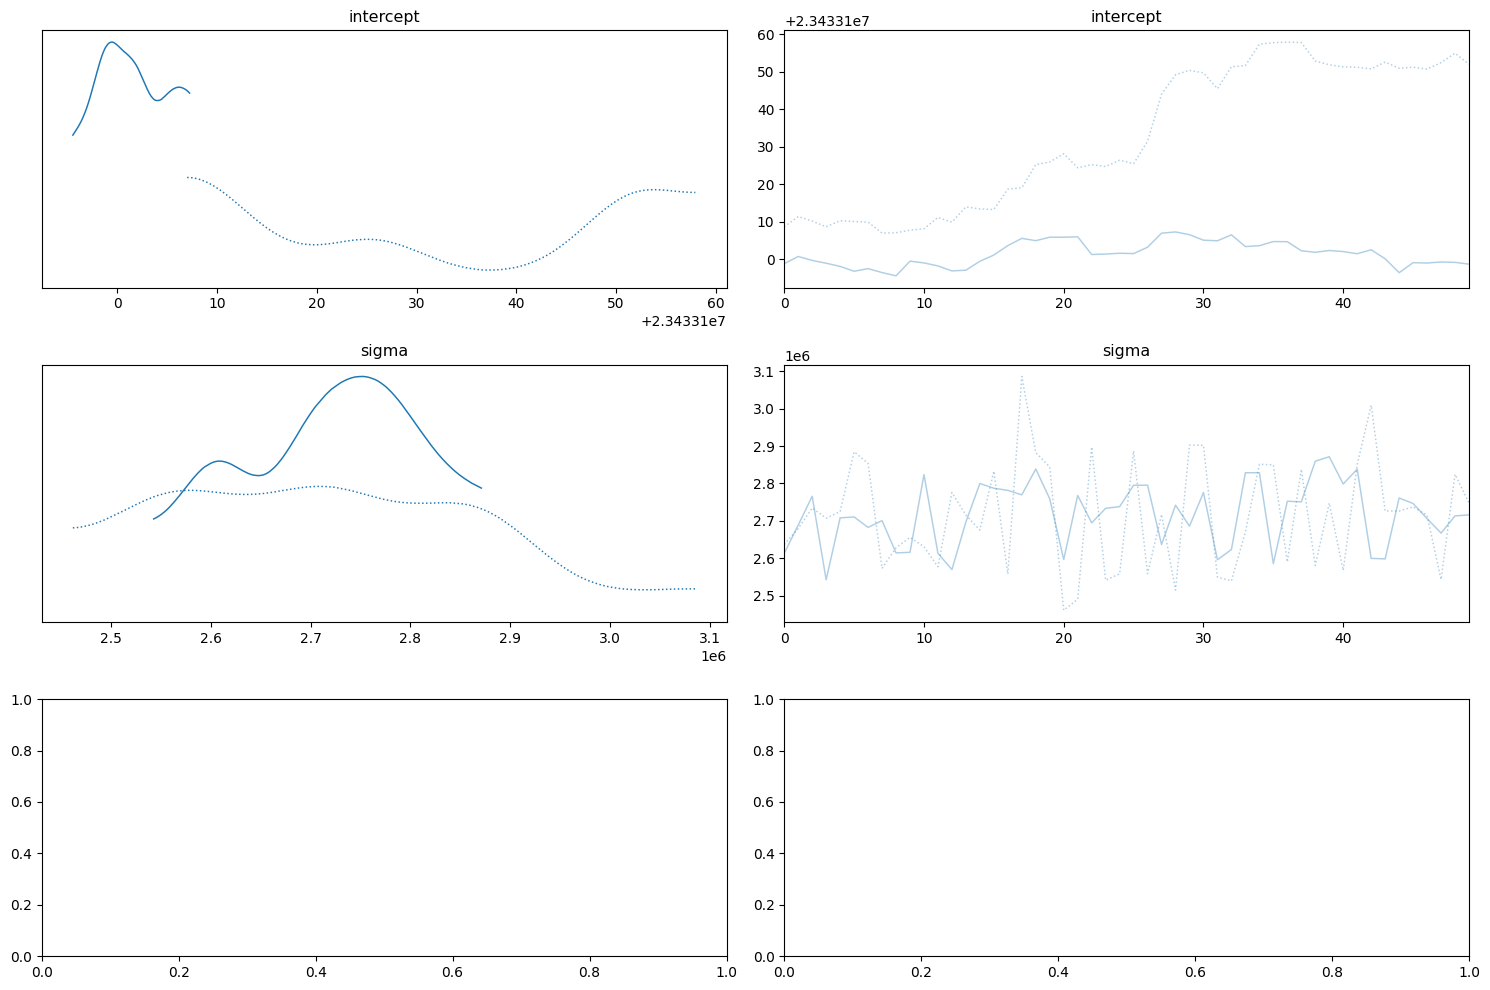

<Figure size 2000x1200 with 0 Axes>

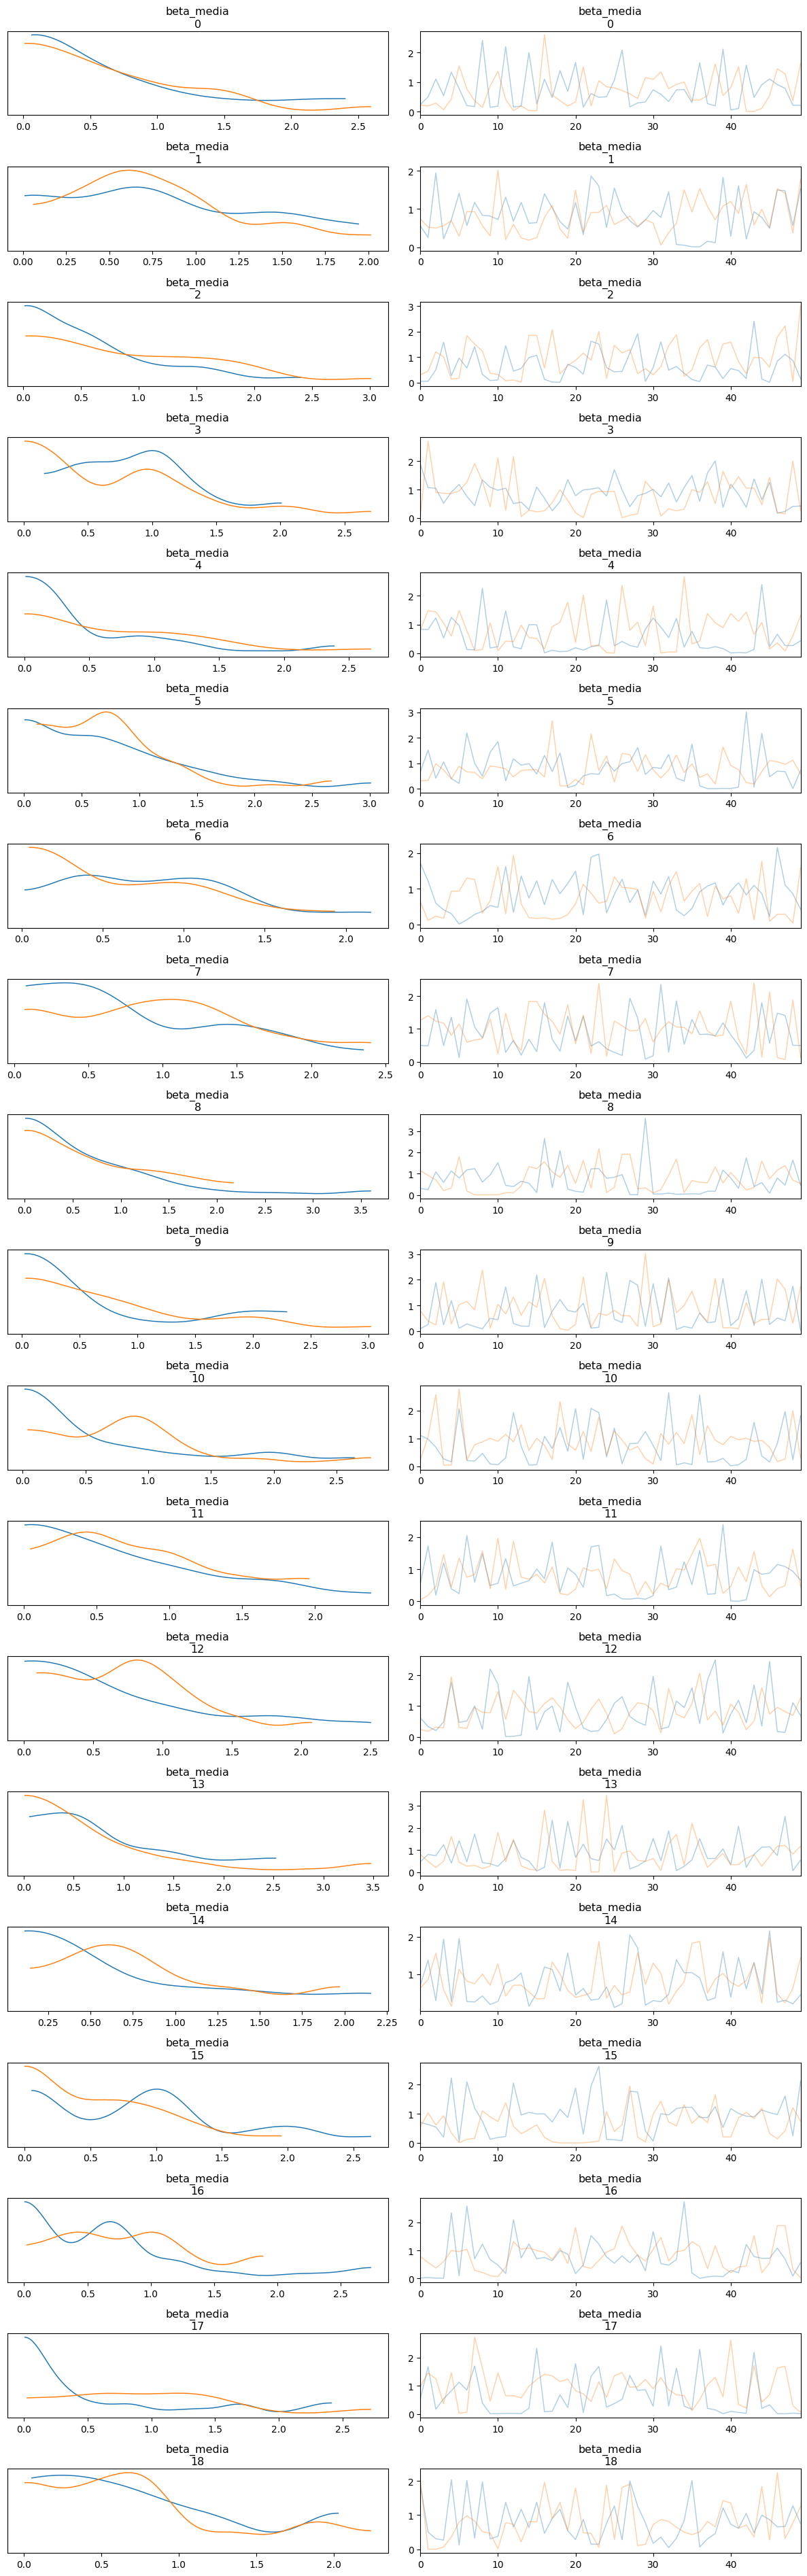

C:\Users\asus\AppData\Local\Temp\ipykernel_9380\574617120.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(media_channels)


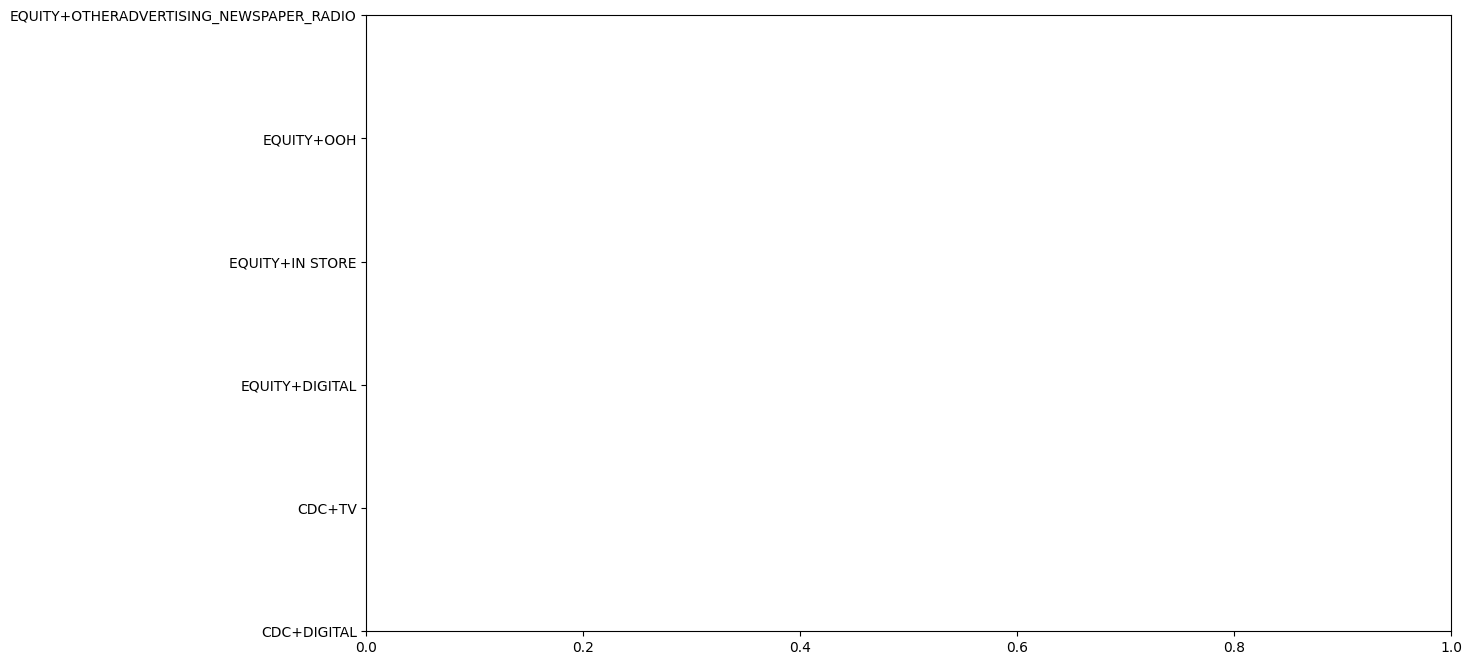

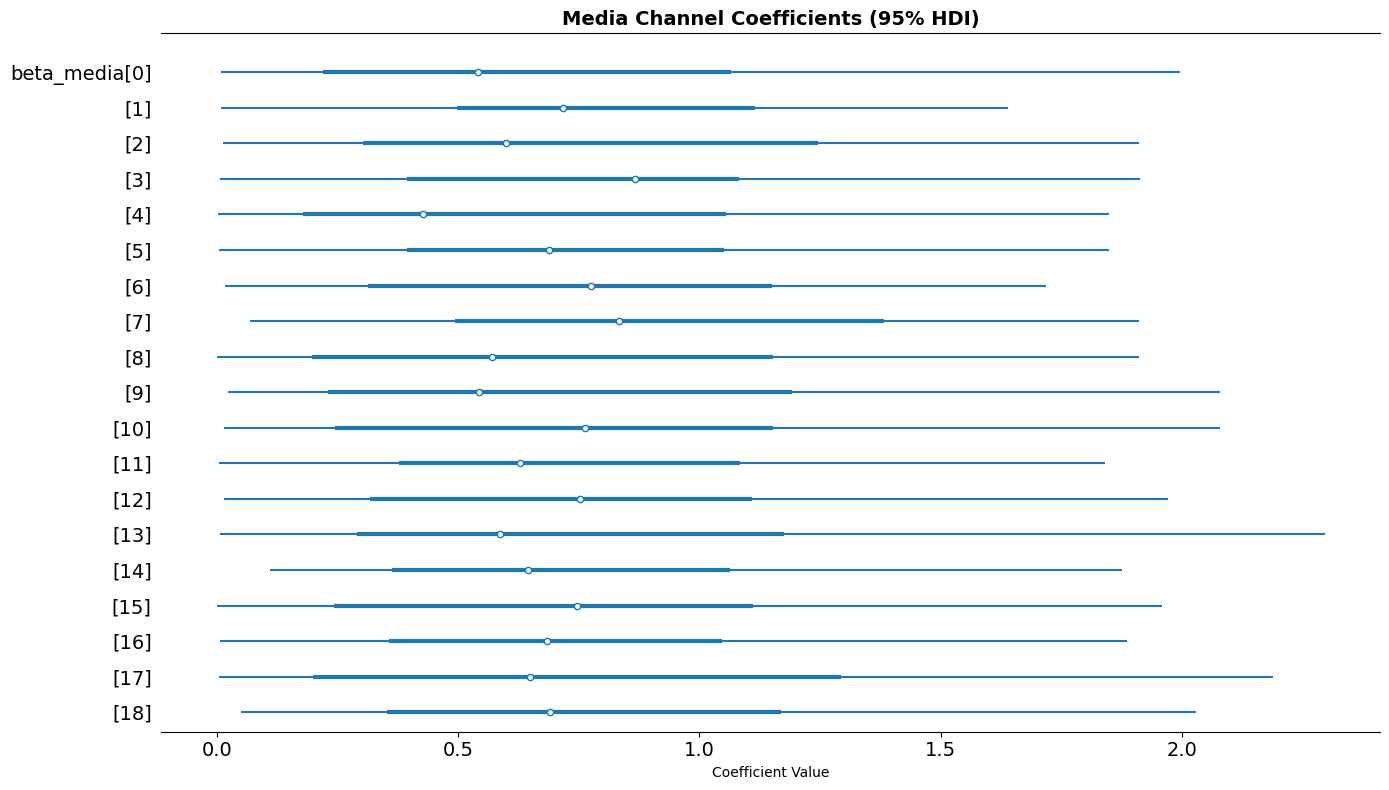

In [39]:

# ============================================================================
# 5. VISUALIZATION
# ============================================================================

# Trace plots for key parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
az.plot_trace(trace, var_names=['intercept', 'sigma'], axes=axes[:2])
plt.tight_layout()
plt.savefig('trace_plots_base.png', dpi=300, bbox_inches='tight')
plt.show()

# Media coefficient trace plots
fig = plt.figure(figsize=(20, 12))
az.plot_trace(trace, var_names=['beta_media'], compact=False)
plt.tight_layout()
plt.savefig('trace_plots_media.png', dpi=300, bbox_inches='tight')
plt.show()

# Posterior distributions of media coefficients
fig, ax = plt.subplots(figsize=(14, 8))
az.plot_forest(
    trace, 
    var_names=['beta_media'],
    combined=True,
    figsize=(14, 8)
)
ax.set_yticklabels(media_channels)
plt.title('Media Channel Coefficients (95% HDI)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig('media_coefficients_forest.png', dpi=300, bbox_inches='tight')
plt.show()


MODEL PERFORMANCE
R²: -0.0117
MAE: 2464037.51
RMSE: 2729722.33
MAPE: 10.75%


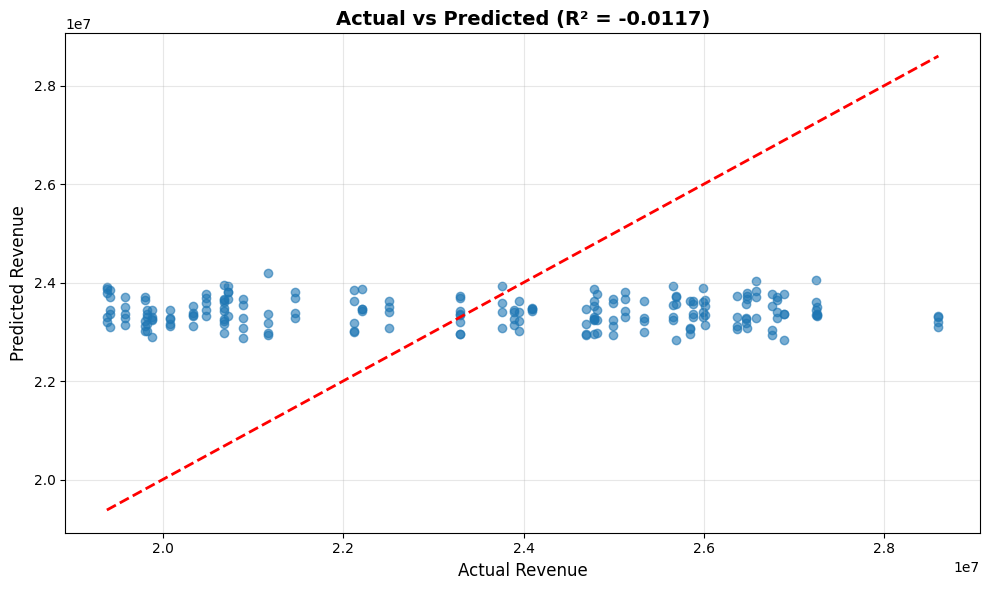

In [40]:

# ============================================================================
# 6. MODEL PERFORMANCE
# ============================================================================

# Posterior predictive check
y_pred_mean = post_pred.posterior_predictive['y_obs'].mean(dim=['chain', 'draw']).values

# Calculate metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred_mean)
mae = mean_absolute_error(y, y_pred_mean)
rmse = np.sqrt(mean_squared_error(y, y_pred_mean))
mape = np.mean(np.abs((y - y_pred_mean) / y)) * 100

print("\n" + "="*80)
print("MODEL PERFORMANCE")
print("="*80)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Actual vs Predicted plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y, y_pred_mean, alpha=0.6)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Actual Revenue', fontsize=12)
ax.set_ylabel('Predicted Revenue', fontsize=12)
ax.set_title(f'Actual vs Predicted (R² = {r2:.4f})', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()


MEDIA CONTRIBUTION TO REVENUE
                                    Channel  Contribution  Contribution_pct
6                                 EQUITY+TV  1.509991e-16         -0.003231
10                              PANJAVED+TV  5.845505e-17         -0.001251
5   EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO  5.463898e-17         -0.001169
9                              PANJAVED+OOH  2.821467e-17         -0.000604
0                               CDC+DIGITAL  2.510531e-17         -0.000537
17   TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO  1.384185e-17         -0.000296
11                             SALT+DIGITAL  1.364136e-17         -0.000292
13    SALT+OTHERADVERTISING_NEWSPAPER_RADIO  7.205802e-18         -0.000154
12                            SALT+IN STORE  0.000000e+00         -0.000000
18                                 TOTAL+TV  0.000000e+00         -0.000000
8                         PANJAVED+IN STORE  0.000000e+00         -0.000000
7                          PANJAVED+DIGITAL  0.000000e+00

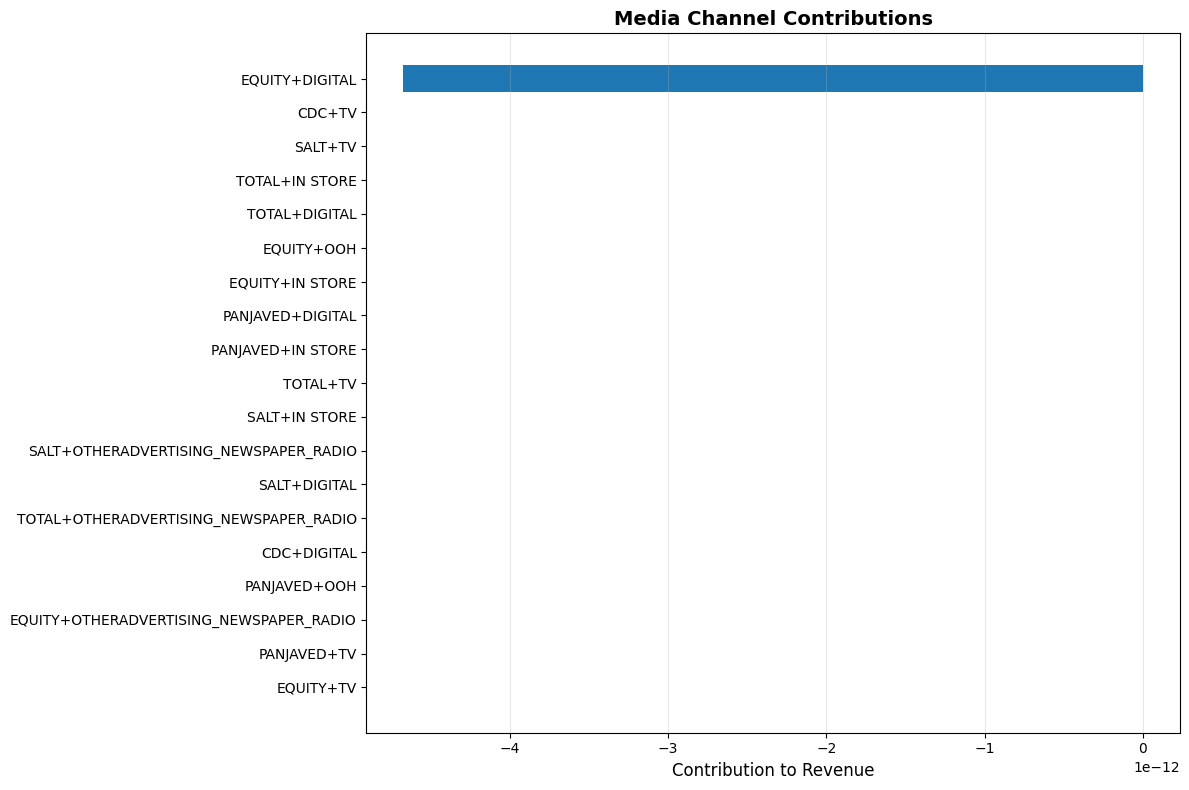

In [41]:

# ============================================================================
# 7. MEDIA CONTRIBUTION ANALYSIS
# ============================================================================

# Extract posterior samples for media coefficients
beta_media_samples = trace.posterior['beta_media'].values.reshape(-1, n_media)

# Calculate contribution (coefficient * mean of standardized variable)
contributions = []
for i, channel in enumerate(media_channels):
    contrib = beta_media_samples[:, i].mean() * X_media[:, i].mean()
    contributions.append(contrib)

contribution_df = pd.DataFrame({
    'Channel': media_channels,
    'Contribution': contributions,
    'Contribution_pct': 100 * np.array(contributions) / np.sum(contributions)
}).sort_values('Contribution', ascending=False)

print("\n" + "="*80)
print("MEDIA CONTRIBUTION TO REVENUE")
print("="*80)
print(contribution_df)

# Contribution plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(contribution_df['Channel'], contribution_df['Contribution'])
ax.set_xlabel('Contribution to Revenue', fontsize=12)
ax.set_title('Media Channel Contributions', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('media_contributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# mmm on Q 2
q2_start_date= '2019-07-01'
q2_end_date = '2019-09-30'
q2_data = [(input_df['week_date']>=q2_start_date) & (input_df['week_date']<=q2_end_date)]

In [50]:
q2_data

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
126,2019-07-05,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
127,2019-07-12,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
128,2019-07-19,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
129,2019-07-26,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
130,2019-08-02,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
131,2019-08-09,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
132,2019-08-16,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
133,2019-08-23,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
134,2019-08-30,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
135,2019-09-06,430149.45000,2903587.5,21287.157143,0,0.0,0,0.0,51099.63740,0.0,...,9.696,0.192850,0.103398,8.5,52.554084,0.008462,0.054707,0.4,0.0,25661600.0


In [51]:

# ============================================================================
# 8. ROI & ROAS ANALYSIS (CDC CHANNELS ONLY)
# ============================================================================

print("\n" + "="*80)
print("ROI & ROAS CALCULATION - CDC CHANNELS")
print("="*80)

# Filter only CDC channels
cdc_channels = [ch for ch in media_channels if ch.startswith('CDC+')]
print(f"\nAnalyzing {len(cdc_channels)} CDC channels: {cdc_channels}")

# You need to provide the actual spend data for CDC channels
# This should be the ORIGINAL spend before any transformation
# Load your spend data
#spend_data = pd.read_csv('your_media_spend_data.csv')  # Should have columns matching CDC channels
spend_data =q2_data.copy()
# Calculate total revenue contribution for each channel
# Using posterior mean of coefficients
beta_media_mean = trace.posterior['beta_media'].mean(dim=['chain', 'draw']).values

# Total contribution = coefficient * sum of all transformed media values
total_contributions = {}
for i, channel in enumerate(media_channels):
    if channel in cdc_channels:
        # Sum of revenue generated across all weeks
        total_revenue_generated = (beta_media_mean[i] * X_media[:, i]).sum()
        total_contributions[channel] = total_revenue_generated

# Calculate ROI and ROAS for CDC channels only
roi_results = []

for channel in cdc_channels:
    # Get actual spend for this channel (you need to provide this)
    # Assuming spend_data has columns matching CDC channels
    if channel in spend_data.columns:
        total_spend = spend_data[channel].sum()
        
        if total_spend > 0:
            revenue_generated = total_contributions[channel]
            
            # ROAS = Revenue / Spend
            roas = revenue_generated / total_spend
            
            # ROI = (Revenue - Spend) / Spend = ROAS - 1
            roi = (revenue_generated - total_spend) / total_spend
            roi_pct = roi * 100
            
            roi_results.append({
                'Channel': channel,
                'Total_Spend': total_spend,
                'Revenue_Generated': revenue_generated,
                'ROAS': roas,
                'ROI': roi,
                'ROI_Percent': roi_pct,
                'Profit': revenue_generated - total_spend
            })

roi_df = pd.DataFrame(roi_results).sort_values('ROAS', ascending=False)

print("\nROI & ROAS for CDC Channels:")
print(roi_df.to_string(index=False))

# Calculate aggregate CDC metrics
if len(roi_df) > 0:
    total_cdc_spend = roi_df['Total_Spend'].sum()
    total_cdc_revenue = roi_df['Revenue_Generated'].sum()
    total_cdc_profit = roi_df['Profit'].sum()
    
    aggregate_roas = total_cdc_revenue / total_cdc_spend if total_cdc_spend > 0 else 0
    aggregate_roi = (total_cdc_revenue - total_cdc_spend) / total_cdc_spend * 100 if total_cdc_spend > 0 else 0
    
    print("\n" + "="*80)
    print("AGGREGATE CDC BRAND METRICS")
    print("="*80)
    print(f"Total CDC Spend: ${total_cdc_spend:,.2f}")
    print(f"Total CDC Revenue Generated: ${total_cdc_revenue:,.2f}")
    print(f"Total CDC Profit: ${total_cdc_profit:,.2f}")
    print(f"Aggregate CDC ROAS: {aggregate_roas:.2f}")
    print(f"Aggregate CDC ROI: {aggregate_roi:.2f}%")


ROI & ROAS CALCULATION - CDC CHANNELS

Analyzing 2 CDC channels: ['CDC+DIGITAL', 'CDC+TV']

ROI & ROAS for CDC Channels:
    Channel  Total_Spend  Revenue_Generated          ROAS  ROI  ROI_Percent        Profit
CDC+DIGITAL 1.728365e+06       9.992007e-16  5.781190e-22 -1.0       -100.0 -1.728365e+06
     CDC+TV 1.953347e+07      -7.105427e-14 -3.637565e-21 -1.0       -100.0 -1.953347e+07

AGGREGATE CDC BRAND METRICS
Total CDC Spend: $21,261,835.00
Total CDC Revenue Generated: $-0.00
Total CDC Profit: $-21,261,835.00
Aggregate CDC ROAS: -0.00
Aggregate CDC ROI: -100.00%



ROI UNCERTAINTY FOR CDC CHANNELS (95% Credible Intervals)

CDC+DIGITAL:
  Mean ROI: -100.00%
  Median ROI: -100.00%
  95% CI: [-100.00%, -100.00%]
  Probability ROI > 0%: 0.00%
  Probability ROI > 50%: 0.00%
  Probability ROI > 100%: 0.00%

CDC+TV:
  Mean ROI: -100.00%
  Median ROI: -100.00%
  95% CI: [-100.00%, -100.00%]
  Probability ROI > 0%: 0.00%
  Probability ROI > 50%: 0.00%
  Probability ROI > 100%: 0.00%


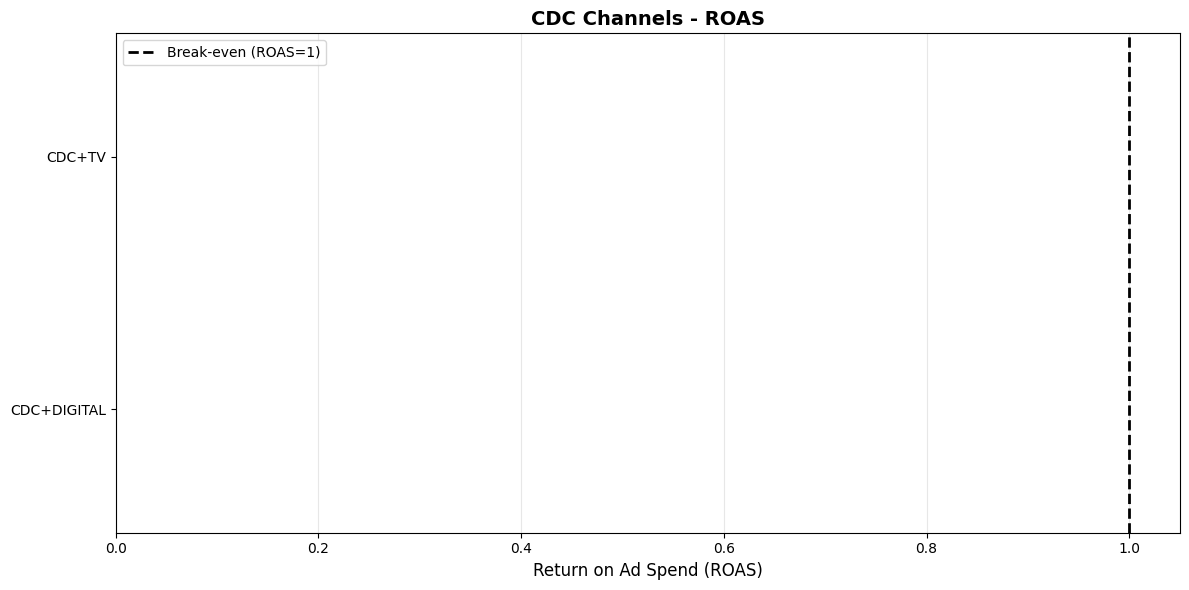

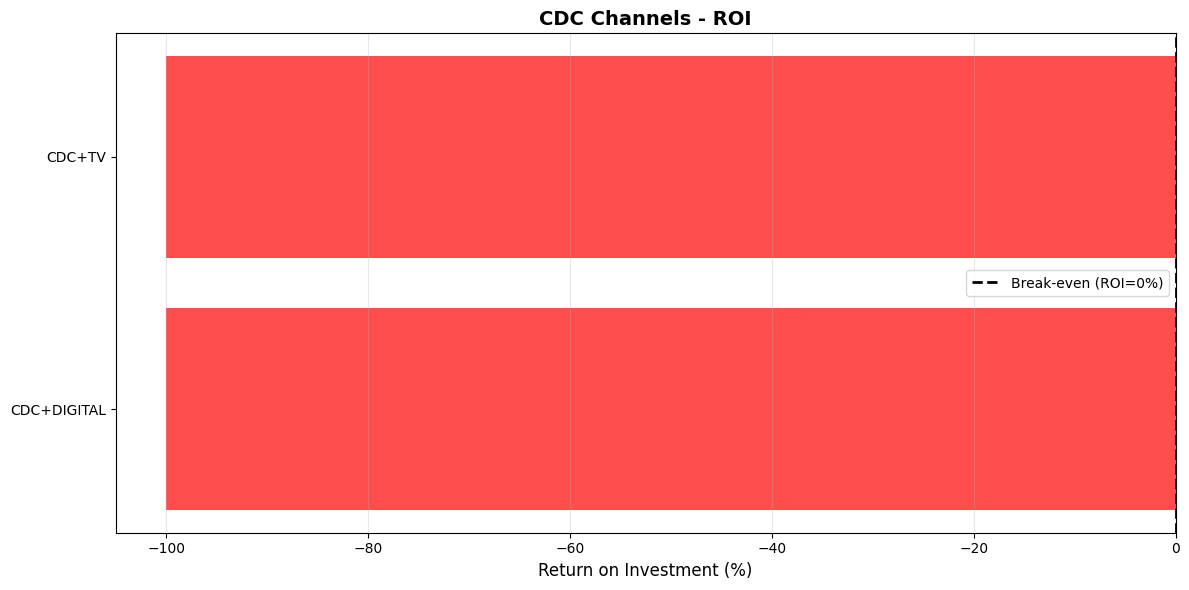

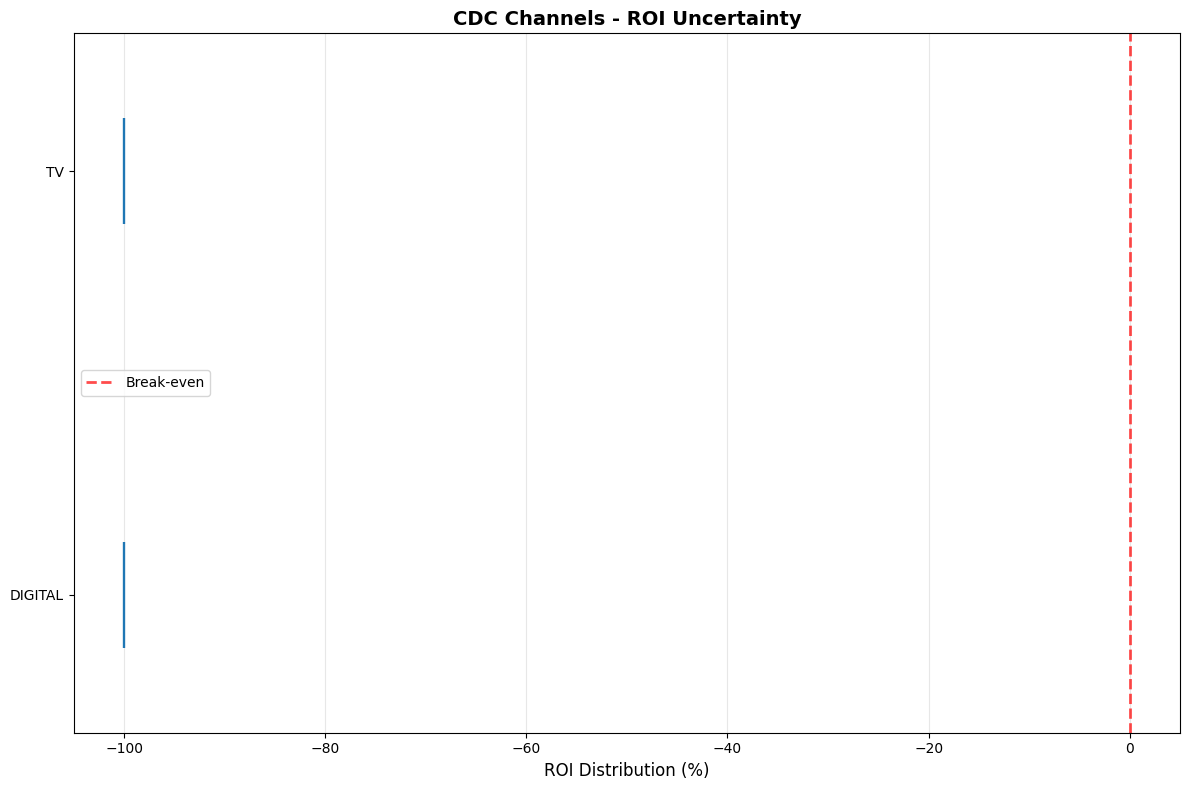

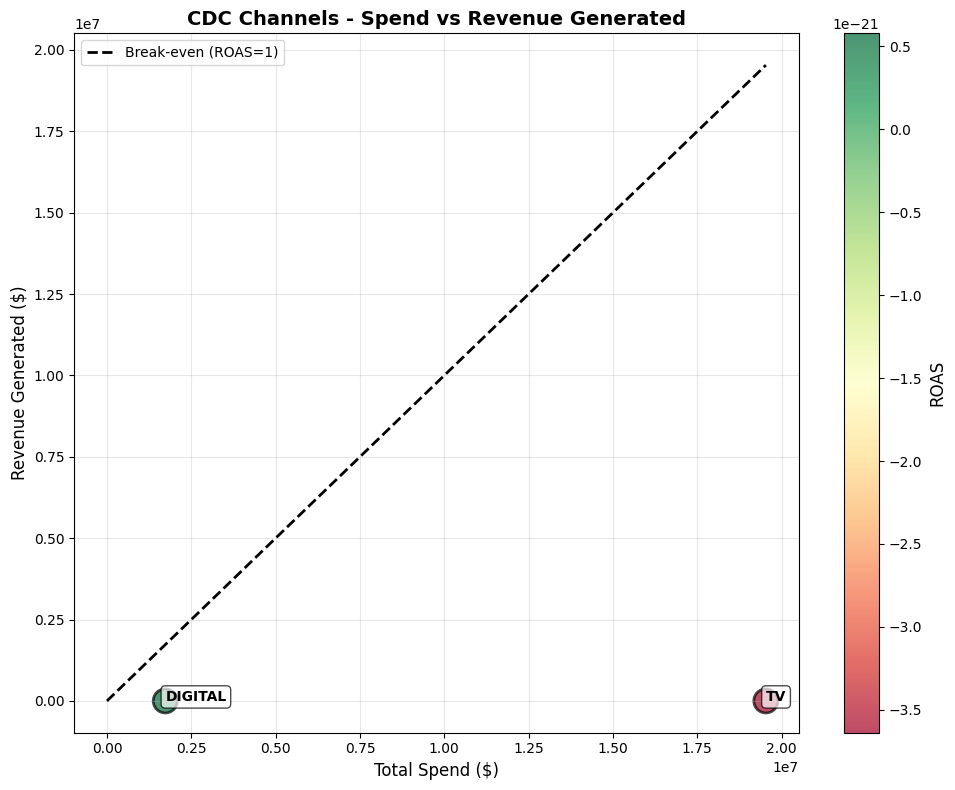

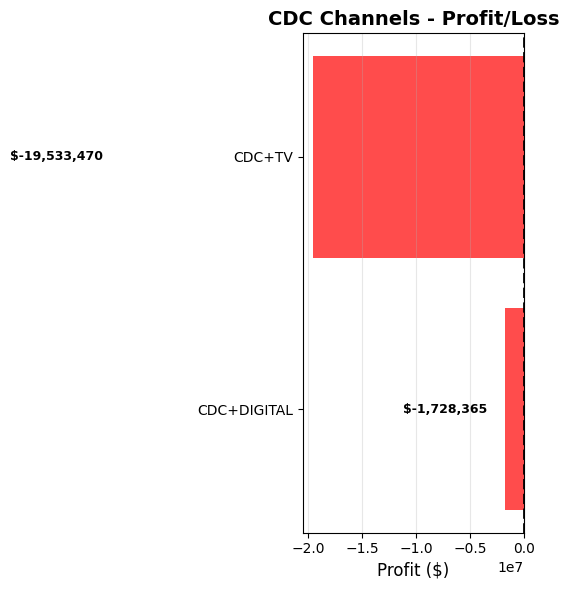

In [52]:

# ============================================================================
# 9. CREDIBLE INTERVALS FOR ROI (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("ROI UNCERTAINTY FOR CDC CHANNELS (95% Credible Intervals)")
print("="*80)

# Calculate ROI distribution for CDC channels using posterior samples
roi_distributions = {}

for i, channel in enumerate(media_channels):
    if channel in cdc_channels and channel in spend_data.columns:
        total_spend = spend_data[channel].sum()
        
        if total_spend > 0:
            # Get all posterior samples for this coefficient
            beta_samples = beta_media_samples[:, i]
            
            # Calculate revenue for each sample
            revenue_samples = (beta_samples[:, np.newaxis] * X_media[:, i]).sum(axis=1)
            
            # Calculate ROI for each sample
            roi_samples = (revenue_samples - total_spend) / total_spend * 100
            
            # Store distribution
            roi_distributions[channel] = roi_samples
            
            # Calculate credible intervals
            roi_mean = roi_samples.mean()
            roi_median = np.median(roi_samples)
            roi_ci_lower = np.percentile(roi_samples, 2.5)
            roi_ci_upper = np.percentile(roi_samples, 97.5)
            
            print(f"\n{channel}:")
            print(f"  Mean ROI: {roi_mean:.2f}%")
            print(f"  Median ROI: {roi_median:.2f}%")
            print(f"  95% CI: [{roi_ci_lower:.2f}%, {roi_ci_upper:.2f}%]")
            print(f"  Probability ROI > 0%: {(roi_samples > 0).mean():.2%}")
            print(f"  Probability ROI > 50%: {(roi_samples > 50).mean():.2%}")
            print(f"  Probability ROI > 100%: {(roi_samples > 100).mean():.2%}")

# ============================================================================
# 10. ROI VISUALIZATIONS (CDC CHANNELS)
# ============================================================================

# ROAS Bar Chart for CDC
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x >= 1 else 'red' for x in roi_df['ROAS']]
ax.barh(roi_df['Channel'], roi_df['ROAS'], color=colors, alpha=0.7)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2, label='Break-even (ROAS=1)')
ax.set_xlabel('Return on Ad Spend (ROAS)', fontsize=12)
ax.set_title('CDC Channels - ROAS', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('cdc_roas_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

# ROI Percentage Bar Chart for CDC
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x >= 0 else 'red' for x in roi_df['ROI_Percent']]
ax.barh(roi_df['Channel'], roi_df['ROI_Percent'], color=colors, alpha=0.7)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Break-even (ROI=0%)')
ax.set_xlabel('Return on Investment (%)', fontsize=12)
ax.set_title('CDC Channels - ROI', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('cdc_roi_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

# ROI Distribution Plot (violin plot) for CDC
if roi_distributions:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Prepare data for violin plot
    roi_data = []
    roi_labels = []
    for channel, roi_samples in sorted(roi_distributions.items(), 
                                       key=lambda x: np.median(x[1]), 
                                       reverse=True):
        roi_data.append(roi_samples)
        roi_labels.append(channel.replace('CDC+', ''))  # Shorten labels
    
    parts = ax.violinplot(roi_data, vert=False, showmeans=True, showmedians=True)
    ax.set_yticks(range(1, len(roi_labels) + 1))
    ax.set_yticklabels(roi_labels)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even')
    ax.set_xlabel('ROI Distribution (%)', fontsize=12)
    ax.set_title('CDC Channels - ROI Uncertainty', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('cdc_roi_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

# Spend vs Revenue Scatter for CDC
if len(roi_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(roi_df['Total_Spend'], roi_df['Revenue_Generated'], 
                         s=300, c=roi_df['ROAS'], cmap='RdYlGn', 
                         alpha=0.7, edgecolors='black', linewidth=2)
    
    # Add diagonal line (break-even line where revenue = spend)
    max_val = max(roi_df['Total_Spend'].max(), roi_df['Revenue_Generated'].max())
    ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Break-even (ROAS=1)')
    
    # Add labels for each point
    for idx, row in roi_df.iterrows():
        channel_label = row['Channel'].replace('CDC+', '')
        ax.annotate(channel_label, 
                    (row['Total_Spend'], row['Revenue_Generated']),
                    fontsize=10, fontweight='bold', 
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax.set_xlabel('Total Spend ($)', fontsize=12)
    ax.set_ylabel('Revenue Generated ($)', fontsize=12)
    ax.set_title('CDC Channels - Spend vs Revenue Generated', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('ROAS', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('cdc_spend_vs_revenue.png', dpi=300, bbox_inches='tight')
    plt.show()

# Profit Comparison for CDC
if len(roi_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ['green' if x >= 0 else 'red' for x in roi_df['Profit']]
    bars = ax.barh(roi_df['Channel'], roi_df['Profit'], color=colors, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
    ax.set_xlabel('Profit ($)', fontsize=12)
    ax.set_title('CDC Channels - Profit/Loss', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, profit) in enumerate(zip(bars, roi_df['Profit'])):
        width = bar.get_width()
        label_x = width + (max(roi_df['Profit']) * 0.01 if width >= 0 else width - max(roi_df['Profit']) * 0.01)
        ax.text(label_x, bar.get_y() + bar.get_height()/2, 
                f'${profit:,.0f}', 
                ha='left' if width >= 0 else 'right', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('cdc_profit_by_channel.png', dpi=300, bbox_inches='tight')
    plt.show()

In [54]:

# ============================================================================
# 11. EFFICIENCY METRICS (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("EFFICIENCY METRICS - CDC CHANNELS")
print("="*80)

# Cost per incremental revenue unit
roi_df['Cost_per_Revenue_Unit'] = roi_df['Total_Spend'] / roi_df['Revenue_Generated']

# Efficiency score (revenue per dollar spent)
roi_df['Efficiency_Score'] = roi_df['Revenue_Generated'] / roi_df['Total_Spend']

print("\nEfficiency Rankings for CDC Channels:")
print(roi_df[['Channel', 'Efficiency_Score', 'Cost_per_Revenue_Unit']].to_string(index=False))

# Best and worst performing CDC channels
if len(roi_df) > 0:
    best_channel = roi_df.iloc[0]
    worst_channel = roi_df.iloc[-1]
    
    print("\n" + "-"*80)
    print("BEST PERFORMING CDC CHANNEL:")
    print(f"  Channel: {best_channel['Channel']}")
    print(f"  ROAS: {best_channel['ROAS']:.2f}")
    print(f"  ROI: {best_channel['ROI_Percent']:.2f}%")
    print(f"  Efficiency Score: {best_channel['Efficiency_Score']:.2f}")
    
    print("\nWORST PERFORMING CDC CHANNEL:")
    print(f"  Channel: {worst_channel['Channel']}")
    print(f"  ROAS: {worst_channel['ROAS']:.2f}")
    print(f"  ROI: {worst_channel['ROI_Percent']:.2f}%")
    print(f"  Efficiency Score: {worst_channel['Efficiency_Score']:.2f}")


EFFICIENCY METRICS - CDC CHANNELS

Efficiency Rankings for CDC Channels:
    Channel  Efficiency_Score  Cost_per_Revenue_Unit
CDC+DIGITAL      5.781190e-22           1.729748e+21
     CDC+TV     -3.637565e-21          -2.749092e+20

--------------------------------------------------------------------------------
BEST PERFORMING CDC CHANNEL:
  Channel: CDC+DIGITAL
  ROAS: 0.00
  ROI: -100.00%
  Efficiency Score: 0.00

WORST PERFORMING CDC CHANNEL:
  Channel: CDC+TV
  ROAS: -0.00
  ROI: -100.00%
  Efficiency Score: -0.00


In [55]:

# ============================================================================
# 12. WEEKLY ROI TIME SERIES (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("CALCULATING WEEKLY ROI TRENDS - CDC CHANNELS")
print("="*80)

# Calculate weekly contributions for CDC channels
weekly_roi_data = []

for i, channel in enumerate(media_channels):
    if channel in cdc_channels and channel in spend_data.columns:
        # Weekly revenue contribution
        weekly_revenue = beta_media_mean[i] * X_media[:, i]
        
        # Weekly spend
        weekly_spend = spend_data[channel].values
        
        # Weekly ROAS
        weekly_roas = np.divide(weekly_revenue, weekly_spend, 
                                out=np.zeros_like(weekly_revenue), 
                                where=weekly_spend!=0)
        
        # Weekly ROI
        weekly_roi = np.divide((weekly_revenue - weekly_spend), weekly_spend, 
                               out=np.zeros_like(weekly_revenue), 
                               where=weekly_spend!=0) * 100
        
        weekly_roi_data.append({
            'Channel': channel,
            'Weekly_ROAS_Mean': weekly_roas.mean(),
            'Weekly_ROAS_Median': np.median(weekly_roas),
            'Weekly_ROAS_Std': weekly_roas.std(),
            'Weekly_ROI_Mean': weekly_roi.mean(),
            'Weeks_Profitable': (weekly_roas > 1).sum(),
            'Total_Weeks': len(weekly_roas),
            'Profitability_Rate': (weekly_roas > 1).sum() / len(weekly_roas) * 100
        })

weekly_roi_df = pd.DataFrame(weekly_roi_data).sort_values('Weekly_ROAS_Mean', ascending=False)
print("\nWeekly ROI Statistics for CDC Channels:")
print(weekly_roi_df.to_string(index=False))

# Plot weekly ROAS trends for CDC channels
if len(cdc_channels) > 0:
    fig, axes = plt.subplots(len(cdc_channels), 1, figsize=(14, 4*len(cdc_channels)))
    if len(cdc_channels) == 1:
        axes = [axes]
    
    for idx, (i, channel) in enumerate([(i, ch) for i, ch in enumerate(media_channels) if ch in cdc_channels]):
        if channel in spend_data.columns:
            weekly_revenue = beta_media_mean[i] * X_media[:, i]
            weekly_spend = spend_data[channel].values
            weekly_roas = np.divide(weekly_revenue, weekly_spend, 
                                    out=np.zeros_like(weekly_revenue), 
                                    where=weekly_spend!=0)
            
            axes[idx].plot(df['week_date'], weekly_roas, linewidth=2, color='steelblue')
            axes[idx].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Break-even')
            axes[idx].fill_between(df['week_date'], weekly_roas, 1, 
                                   where=(weekly_roas >= 1), alpha=0.3, color='green', 
                                   label='Profitable')
            axes[idx].fill_between(df['week_date'], weekly_roas, 1, 
                                   where=(weekly_roas < 1), alpha=0.3, color='red',
                                   label='Unprofitable')
            axes[idx].set_title(f'{channel.replace("CDC+", "")} - Weekly ROAS Over Time', 
                               fontsize=12, fontweight='bold')
            axes[idx].set_ylabel('ROAS', fontsize=10)
            axes[idx].legend(loc='best')
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
    
    axes[-1].set_xlabel('Week Date', fontsize=10)
    plt.tight_layout()
    plt.savefig('cdc_weekly_roas_trends.png', dpi=300, bbox_inches='tight')
    plt.show()


CALCULATING WEEKLY ROI TRENDS - CDC CHANNELS


ValueError: operands could not be broadcast together with shapes (204,) (13,) (204,) (13,) 

In [ ]:

# ============================================================================
# 13. SAVE ROI RESULTS
# ============================================================================

# Save ROI results
roi_df.to_csv('roi_analysis.csv', index=False)
weekly_roi_df.to_csv('weekly_roi_stats.csv', index=False)

# Save ROI distributions
roi_dist_df = pd.DataFrame(roi_distributions)
roi_dist_df.to_csv('roi_distributions.csv', index=False)

print("\n" + "="*80)
print("MODELING COMPLETE!")
print("="*80)
print("Saved files:")
print("- mmm_trace.nc (posterior samples)")
print("- mmm_summary.csv (coefficient summaries)")
print("- media_contributions.csv (channel contributions)")
print("- roi_analysis.csv (ROI & ROAS by channel)")
print("- weekly_roi_stats.csv (weekly ROI statistics)")
print("- roi_distributions.csv (ROI posterior distributions)")
print("- Various PNG plots including ROI visualizations")